# Phase 1: LIF Model Implementation & Testing 

## 1. Introduction

**Goal:**  
Implement and validate the Leaky Integrate-and-Fire (LIF) neuron model.  
This phase ensures the simulation code is correct before generating large datasets.


## 2. The LIF Model

- **Equation:**  
  $$
  \tau_m \frac{dV}{dt} = -(V - E_L) + \frac{I}{g_L}
  $$
- **Spiking:**  
  When $V \geq V_{th}$, a spike occurs and $V$ is reset to $V_{reset}$.


**Parameters:**  
- $\tau_m$: Membrane time constant  
- $E_L$: Resting potential  
- $g_L$: Leak conductance  
- $V_{th}$: Threshold  
- $V_{reset}$: Reset potential  
- $I$: Input current  
- $dt$: Time step  
- $T$: Total simulation time  
- $t_{ref}$: Refractory period

---

## 3. Implementation

In [4]:
# Import necessary modules
import sys
import os
import numpy as np

sys.path.append(os.path.abspath(os.path.join('..', '.')))

import matplotlib.pyplot as plt
from src.lif_model import lif_simulate
from src.plotting import plot_lif_simulation 


In [5]:
# Define parameters
params = {
    'T': 200.0,        # ms
    'dt': 0.1,         # ms
    'E_L': -75.0,      # mV
    'V_th': -55.0,     # mV
    'V_reset': -75.0,  # mV
    'tau_m': 10.0,     # ms
    'g_L': 10.0,       # nS
    'I': 201.0,        # pA
    'tref': 2.0        # ms
}

In [6]:
# Run simulation
t, V, spikes = lif_simulate(**params)

## 4. Visualization


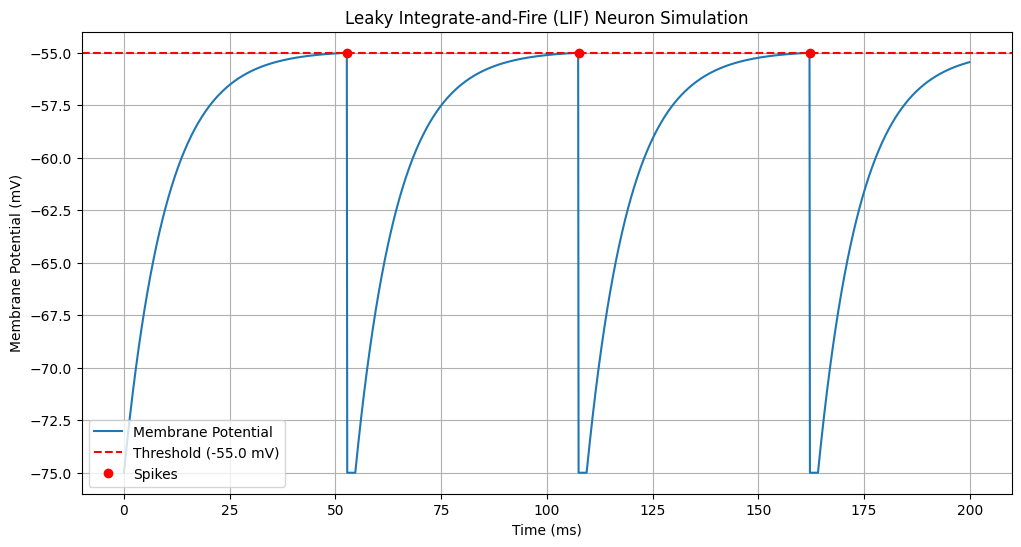

In [7]:
# Plot the voltage trace and spikes
plot_lif_simulation(t, V, spikes, params['V_th'])

## 5. Results & Discussion

- **Does the voltage trace show expected integration and spiking?**
- **Are spikes occurring at the right threshold and resetting properly?**
- **Does the resting potential match $E_L$ between spikes?**

 **Observations** 
 - The voltage trace shows the expected integration: the membrane potential rises smoothly from the resting potential ($E_L = -75$ mV) towards the threshold ($V_{th} = -55$ mV) under constant input current.
- Spikes occur exactly when the membrane potential reaches the threshold. Each spike is marked by a red dot at $V_{th}$.
- After each spike, the membrane potential is reset to $V_{reset} = -75$ mV, as expected.
- Between spikes, the membrane potential returns to and fluctuates around the resting potential ($E_L$), confirming correct model behavior.
- The intervals between spikes are regular, consistent with constant input and model parameters.


 **Conclusion** 
- The LIF model implementation is correct. The neuron integrates input, spikes at threshold, and resets properly, matching theoretical expectations.